Here we try to protect only the Labels of the underlying training data. I have tried using the randomised response mechanism to flip the training labels. Due to the post processing property of DP, our whole algo is epsilon DP as well. 

For all subsequent experiments, unless mentioned, sampling rate of the graph is 100%, and PPR is calculated for M = 200 nodes. 

In [2]:
import subprocess
import pandas as pd
import numpy as np


def run_experiment(topk, ppr_norm, dataset, epsilon):
    print(f"Running experiment with label DP and topk={topk}, ppr_normalization={ppr_norm}, data_file={dataset}, epsilon = {epsilon}")
    
    command = [
        "python", "main.py",
        f"--topk={topk}",
        f"--ppr_normalization={ppr_norm}",
        f"--data_file={dataset}",
        f"--label_dp=True",
        f"--epsilon_label_dp={epsilon}",
        f"--privacy_amplify_sampling_rate=1",
        f"--ppr_num=200"
    ]
    
    result = subprocess.run(command, capture_output=True, text=True, encoding='utf-8')
    
    output = result.stdout
    accuracy = None
    for line in output.splitlines()[-10:]:
        if "Testing accuracy" in line:
            try:
                accuracy = float(line.split(":")[1].strip())
            except ValueError:
                accuracy = None
            break
    
    return accuracy


In [3]:
topks = [2,4,6]
ppr_normalization = ['row']
data_file = ['data/cora_ml', 'data/pubmed', 'data/ms_academic']
n_trials = 3
eps = [1,3,5]

results_df_label_dp = pd.DataFrame(columns = ['epsilon', 'topk', 'ppr_normalization', 'data_file', 'Accuracy', 'Std'])

for topk in topks:
    for ppr_norm in ppr_normalization:
        for dataset in data_file:
            for epsilon in eps:
                accuracies = []
                for trial in range(n_trials):
                    print(f"Trial {trial + 1}/{n_trials}")
                    accuracy = run_experiment(topk, ppr_norm, dataset, epsilon)
                    if accuracy is not None:
                        accuracies.append(accuracy)
                
                if accuracies:
                    avg_accuracy = np.mean(accuracies)
                    std_accuracy = np.std(accuracies)
                    # Append the average result to the DataFrame
                    results_df_label_dp = results_df_label_dp.append({
                        'epsilon' : epsilon,
                        'topk': topk,
                        'ppr_normalization': ppr_norm,
                        'data_file': dataset,
                        'Accuracy': avg_accuracy,
                        'Std': std_accuracy
                    }, ignore_index=True)
                    print(f"Average accuracy: {avg_accuracy:.4f} ± {std_accuracy:.4f}")
                else:
                    print(f"Failed to obtain accuracy for topk={topk}, ppr_normalization={ppr_norm}, data_file={dataset}, epsilon = {epsilon}")


results_df_label_dp.head()

results_df_label_dp.to_csv("label_dp_experiment_results_with_trials.csv", index=False)


Trial 1/3
Running experiment with label DP and topk=2, ppr_normalization=row, data_file=data/cora_ml, epsilon = 1
Trial 2/3
Running experiment with label DP and topk=2, ppr_normalization=row, data_file=data/cora_ml, epsilon = 1
Trial 3/3
Running experiment with label DP and topk=2, ppr_normalization=row, data_file=data/cora_ml, epsilon = 1
Average accuracy: 0.2745 ± 0.0296
Trial 1/3
Running experiment with label DP and topk=2, ppr_normalization=row, data_file=data/cora_ml, epsilon = 3
Trial 2/3
Running experiment with label DP and topk=2, ppr_normalization=row, data_file=data/cora_ml, epsilon = 3
Trial 3/3
Running experiment with label DP and topk=2, ppr_normalization=row, data_file=data/cora_ml, epsilon = 3
Average accuracy: 0.7183 ± 0.0191
Trial 1/3
Running experiment with label DP and topk=2, ppr_normalization=row, data_file=data/cora_ml, epsilon = 5
Trial 2/3
Running experiment with label DP and topk=2, ppr_normalization=row, data_file=data/cora_ml, epsilon = 5
Trial 3/3
Running ex

In [4]:
results_df_label_dp

,epsilon,topk,ppr_normalization,data_file,Accuracy,Std
0,1,2,row,data/cora_ml,0.274533,0.029616
1,3,2,row,data/cora_ml,0.718267,0.019066
2,5,2,row,data/cora_ml,0.830733,0.010229
3,1,2,row,data/pubmed,0.638067,0.032070
4,3,2,row,data/pubmed,0.828067,0.003847
5,5,2,row,data/pubmed,0.861467,0.007114
6,1,2,row,data/ms_academic,0.177767,0.079049
7,3,2,row,data/ms_academic,0.932633,0.009291
8,5,2,row,data/ms_academic,0.951233,0.001613
9,1,4,row,data/cora_ml,0.311667,0.111245


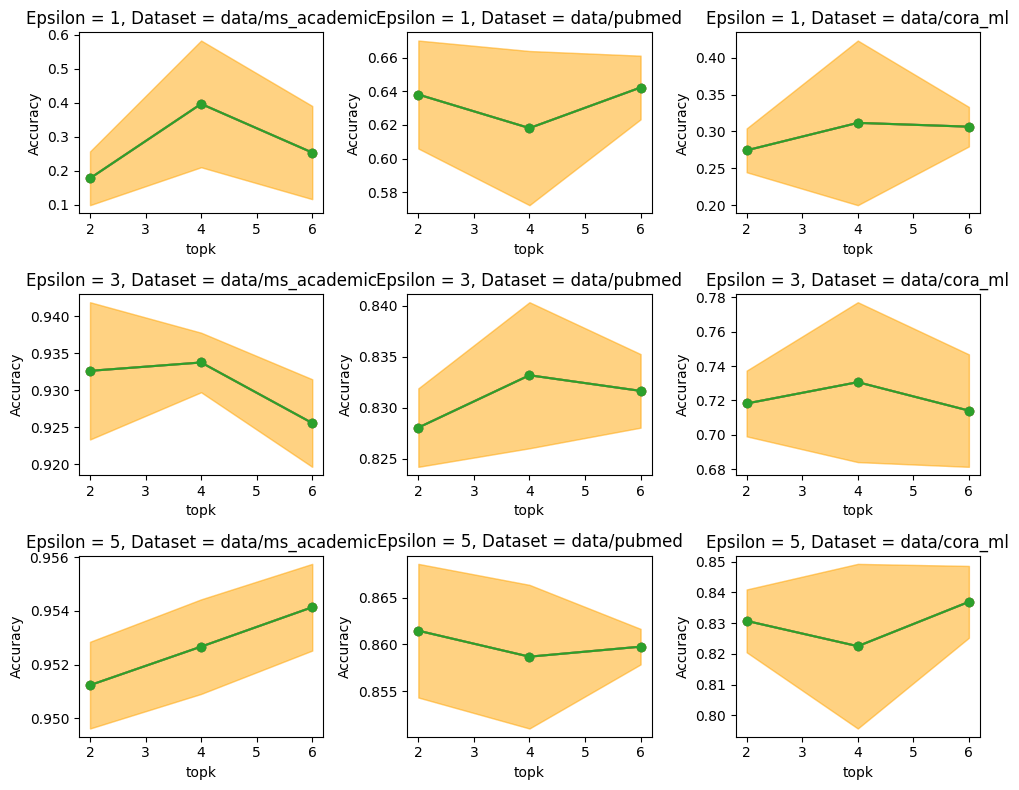

In [20]:
import matplotlib.pyplot as plt

epsilons = [1, 3, 5]
datasets = ['data/ms_academic', 'data/pubmed', 'data/cora_ml']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8))

for i in range(3):
    for j in range(3):
        for k in range(3):
            reqrow = results_df_label_dp[(results_df_label_dp['epsilon'] == (epsilons[j])) & 
                                         (results_df_label_dp['data_file'] == datasets[k]) & 
                                         (results_df_label_dp['ppr_normalization'] == 'row')]['Accuracy']
            
            reqstdrow = results_df_label_dp[(results_df_label_dp['epsilon'] == (epsilons[j])) & 
                                            (results_df_label_dp['data_file'] == datasets[k]) & 
                                            (results_df_label_dp['ppr_normalization'] == 'row')]['Std']
            axes[j][k].plot(topks, reqrow, marker='o')
            axes[j][k].fill_between(topks, reqrow-reqstdrow, reqrow+reqstdrow, alpha=0.2, color = 'orange')
            axes[j][k].set_title(f"Epsilon = {epsilons[j]}, Dataset = {datasets[k]}")
            axes[j][k].set_xlabel("topk")
            axes[j][k].set_ylabel("Accuracy")

plt.tight_layout()
plt.show()
